<a href="https://colab.research.google.com/github/mertalver/MachineLearning/blob/main/MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Required Libraries and Dataset

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing the Dataset

In [148]:
dataSet = pd.read_csv("insurance.csv")
X = dataSet.drop(columns=["charges"])
y = dataSet["charges"].values
y = y.reshape(-1, 1)

# 3. Performing An Exploratory Data Analysis

## 3.1 Examine the distribution of Bmi (Body Mass Index)

Text(0, 0.5, 'Frequency')

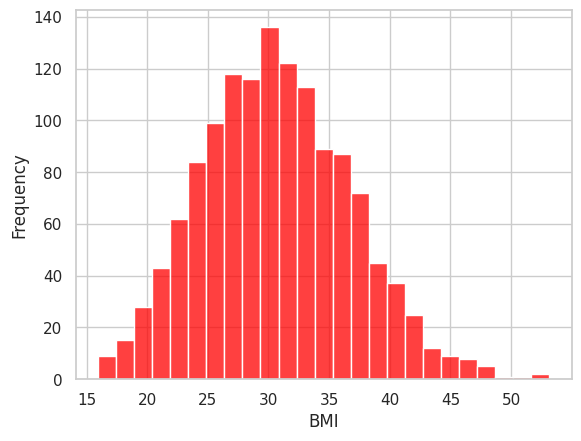

In [149]:
# BMI (Body Mass Index) dağılım grafiği.
sns.set_style('whitegrid')
sns.histplot(dataSet['bmi'], color='red')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Aşağıdaki grafiğe göre sigorta yaptıran insanların vücut kitle indekslerinin (BMI) 25-35 aralıklarında yoğunlaştığını görebiliriz.

## 3.2 Examine the relationship between “smoker” and “charges”

<Axes: xlabel='smoker', ylabel='charges'>

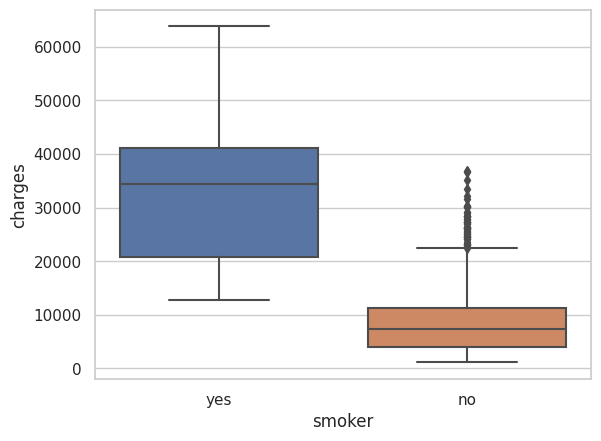

In [150]:
# Kişinin sigara içip içmemesi ile ödenen sigorta ücreti arasındaki ilişki.
sns.boxplot(x=dataSet["smoker"], y=dataSet["charges"])

# Sigara içenlerin daha fazla para ödediği (charges) görülmektedir

## 3.3 Examine the relationship between “smoker” and “region”

<Axes: xlabel='smoker', ylabel='count'>

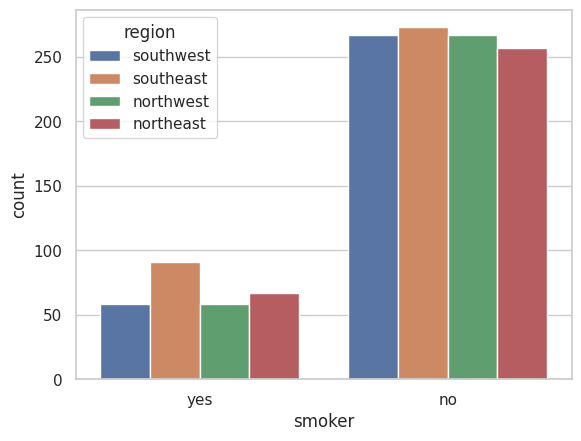

In [151]:
# Bölgelere göre sigara içen kişilerin sayısını gösteren grafik.
sns.countplot(x=dataSet["smoker"], hue=dataSet["region"])

# Sigara içmeyenlerin azınlıkta olduğu ve southeast'ın her iki grupta da en fazla sigortaya sahip olduğunu görüyoruz.

## 3.4 Examine the relationship between “bmi” and “sex”.

<Axes: xlabel='sex', ylabel='bmi'>

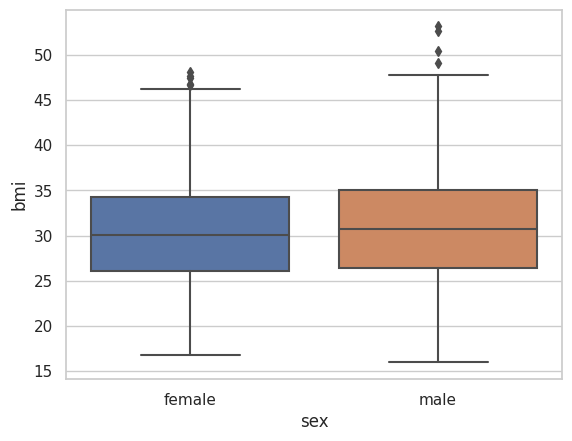

In [152]:
# Cinsiyetlere göre BMI (Body Mass Index) dağılımı.
sns.boxplot(x=dataSet["sex"], y=dataSet["bmi"])

# Erkeklerin vücut kitle indekslerinin kadınlara oranla daha fazla olduğunu görüyoruz.

## 3.5 Find the "region" with the most "children"

In [153]:
# En yüksek çocuğa sahip bölgenin adı ve çocukların sayısı.
bolgeye_gore_cocuklar = dataSet.groupby('region')['children'].sum()
bolgeye_gore_cocuklar_max = bolgeye_gore_cocuklar.idxmax()
cocuk_sayisi = bolgeye_gore_cocuklar[bolgeye_gore_cocuklar_max]
print(f"En yüksek çocuk sayısına sahip bölge: {bolgeye_gore_cocuklar_max}'dir, bu bölgedeki toplam çocukların sayısı: {cocuk_sayisi}'dir")

En yüksek çocuk sayısına sahip bölge: southeast'dir, bu bölgedeki toplam çocukların sayısı: 382'dir


## 3.6 Examine the relationship between “age” and “bmi”

<Axes: xlabel='age', ylabel='bmi'>

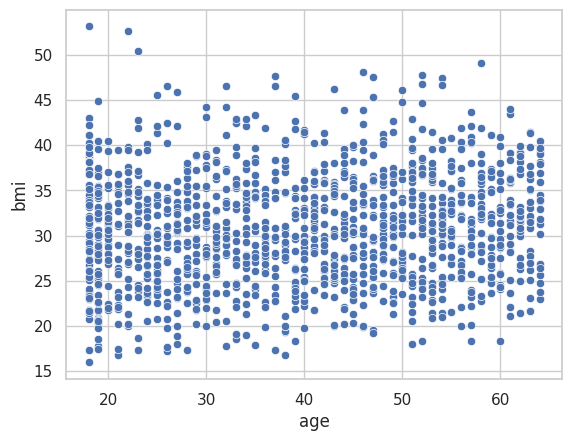

In [154]:
# Yaşlara göre BMI (Body Mass Index) dağılımını gösteren grafik
sns.scatterplot(x=dataSet["age"], y=dataSet["bmi"])

# Genel olarak yaşlara göre vücut kitle indeksinin homojen olarak dağıldığını görebiliriz.

## 3.7 Examine the relationship between “bmi” and “children”

<Axes: xlabel='children', ylabel='bmi'>

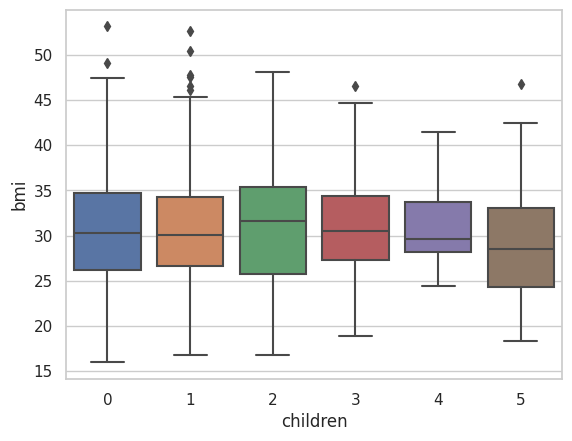

In [155]:
# Çocuk sayısı ve BMI (Body Mass Index) arasındaki ilişkiyi gösteren grafik
sns.boxplot(x=dataSet["children"], y=dataSet["bmi"])

# Vücut kitle indeksinin belli çocuk sayısında fazla olduğunu ve bu insanların çoğunlukta olduğunu görüyoruz.

## 3.8 Is there an outlier in the "bmi" variable? Please review.

<Axes: xlabel='bmi'>

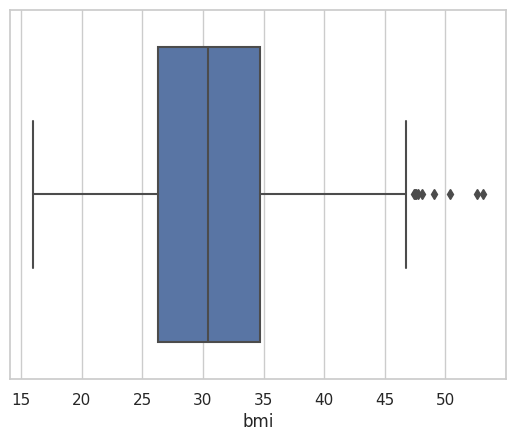

In [156]:
sns.boxplot(x=dataSet["bmi"])

# BMI (Body Mass Index)'in grafiğinden outlier (aykırı) değerleri görebiliriz.
# Outlier değerler içi dolu siyah renkli dörtgen şeklinde gözükmektedirler
# Grafiğe göre birden fazla outlier (aykırı) değer yer almaktadır.

## 3.9 Examine the relationship between “bmi” and “charges”

<Axes: xlabel='bmi', ylabel='charges'>

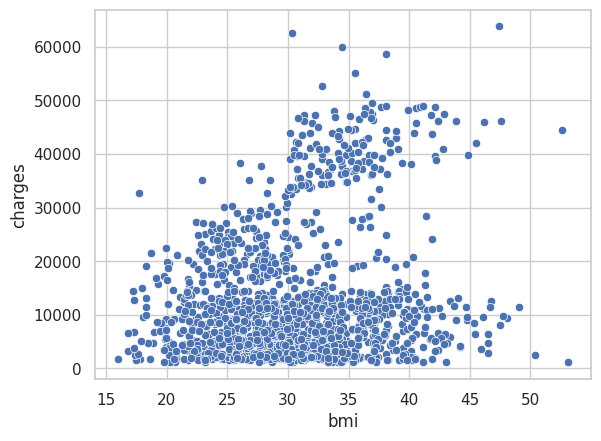

In [157]:
# BMI (Body Mass Index) ile ödenen sigorta ücreti arasındaki ilişkiyi gösteren grafik
sns.scatterplot(x=dataSet['bmi'], y=dataSet['charges'])

# Genel olarak vücut kitle indeksi arttıkça daha fazla ücret ödendiğini söyleyebiliriz.

## 3.10 Examine the relationship between “region”, “smoker” and “bmi” using bar plot

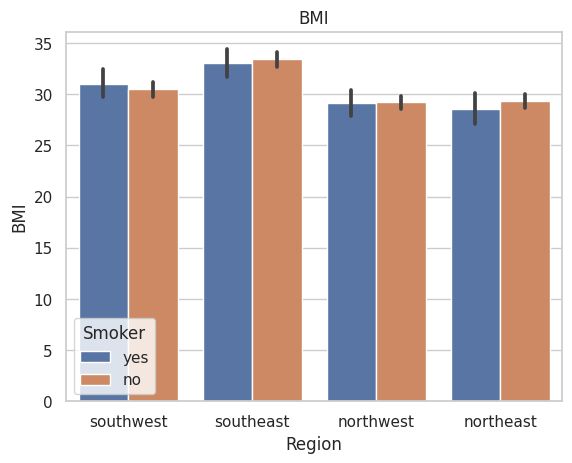

In [158]:
# BMI (Body Mass Index), Bölge ve sigara içip içmeme durumlarını gösteren grafik
sns.set(style="whitegrid")
sns.barplot(x=dataSet['region'], y=dataSet['bmi'], hue=dataSet['smoker'])
plt.title("BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")

# Bölgelere göre sigara içen ve içmeyen insanların vücut kitle indeksleri karşılaştırılmıştır.
# Tabloya göre southwest bölgesi hariç sigara içmeyenlerin vücut kitle indekslerinin içmeyenlere göre bir tık daha fazla olduğunu söyleyebiliriz.

# 4. Data Preprocessing

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Öncelikle aşağıda label encoding yöntemini kullanarak kategorik değerleri (yes, no şeklinde) mantıksal değerlere (1, 0) çevirdim
le = LabelEncoder()
X["smoker"] = le.fit_transform(X["smoker"])
X["sex"] = le.fit_transform(X["sex"])

# Aşağıda ise region sütunu için One-Hot encoding yöntemini kullandım
# southwest -> 0001, southeast -> 0010, northwest -> 0100, northeast -> 1000, değerlerini aldı.
# Böylece tüm bağımsız değişkenleri sürekli değerlere (continuous) çevirdim.
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [5])], remainder="passthrough")
X = ct.fit_transform(X)

# Aşağıda test size için veri setinin 4'te 1'ini ayırdım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Aşağıda X ve y değerlerini StandarScaler aracılığıyla normalleştirdim böylece daha iyi ve hızlı bir şekilde yakınsamasını sağladım.
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)

# 5. Model Selection

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Aşağıda regresyon için bulunan tüm modelleri çağırdım.
linear_regressor = LinearRegression()
lasso_regressor = Lasso()
ridge_regressor = Ridge()
sv_regressor = SVR(kernel="rbf")
decisiontree_regressor = DecisionTreeRegressor()
randomforest_regressor = RandomForestRegressor(n_estimators=10)

#Ardından her bir regresyon modelini eğittim.
linear_regressor.fit(X_train, y_train)
lasso_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)
sv_regressor.fit(X_train, y_train.ravel())
decisiontree_regressor.fit(X_train, y_train)
randomforest_regressor.fit(X_train, y_train.ravel())

# Son olarak ise her bir modele çapraz doğrulama (cross validation) uyguladım.
# Her bir model için 5 katlı bir çapraz doğrulama gerçekteştirdim ve bunların ortalamasını aldım.
# Ortalama sonuçlarına bakarak en yüksek değere sahip modelin SVR olduğunu ardından ona çok yakın bir değerle Random Forest olduğunu görüyoruz.
# Sonuç olarak en iyi performans sergileyen modeli SVR -Destek Vektör Regresyonu- olarak seçiyoruz.
print("Lineer Regresyonunun cross-validation ortalaması:", np.mean(cross_val_score(linear_regressor, X_train, y_train, cv=5)))
print("Lasso Regresyonunun cross-validation ortalaması:", np.mean(cross_val_score(lasso_regressor, X_train, y_train, cv=5)))
print("Ridge Regresyonunun cross-validation ortalaması:", np.mean(cross_val_score(ridge_regressor, X_train, y_train, cv=5)))
print("Destek Vektör Regresyonunun (SVR) cross-validation ortalaması:", np.mean(cross_val_score(sv_regressor, X_train, y_train.ravel(), cv=5)))
print("Karar Ağacı Regresyonunun cross-validation ortalaması:", np.mean(cross_val_score(decisiontree_regressor, X_train, y_train, cv=5)))
print("Random Forest Regresyonunun cross-validation ortalaması:", np.mean(cross_val_score(randomforest_regressor, X_train, y_train.ravel(), cv=5)))

Lineer Regresyonunun cross-validation ortalaması: 0.7219877871289336
Lasso Regresyonunun cross-validation ortalaması: -0.017702034848710423
Ridge Regresyonunun cross-validation ortalaması: 0.7219425700575715
Destek Vektör Regresyonunun (SVR) cross-validation ortalaması: 0.8103556215037212
Karar Ağacı Regresyonunun cross-validation ortalaması: 0.6655854680211304
Random Forest Regresyonunun cross-validation ortalaması: 0.7859832794190462


# 6. Hyper-parameter Optimization

In [161]:
from sklearn.model_selection import GridSearchCV

# Grid Search için Destek Vektörü Regresyonunun alabileceği hiper-parametrelerden bir dictionary oluşturdum.
param_grid = {'C': [1, 5, 10],
              'kernel': ["linear", "rbf", "poly", "sigmoid"],
              'gamma': ["scale", "auto"]}

# Ardından her bir parametreyi kullanarak eğittim.
grid_search = GridSearchCV(estimator=sv_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train.ravel())

# Son olarak ise grid_search'ın aldığı en yüksek skor'u ve bunu hangi parametrelerde elde ettiğini buldum.
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.8103616168801333


# 7. Model Evaluation

In [162]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# İlk olarak regresörümü daha önce elde ettiğim verilere göre oluşturdum ve buna uygun parametre değerlerini girdim.
regressor = SVR(kernel="rbf", gamma="auto", C=1.0)
regressor.fit(X_train, y_train.ravel())

y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))

# Son olarak ise modelin ne kadar başarılı olduğunu görmek için r2_score, root_mean_squared_error ve mean_absolute_error ölçümlerini kullandım.
r2_score = r2_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)

print("R² değeri:", r2_score)
print("RMSE değeri:", np.sqrt(mean_squared_error))
print("MSE değeri:", mean_absolute_error)

# 0.887 değerinde bir r2_score'a sahip oldukça başarılı bir model elde ettim.

R² değeri: 0.8873197957909095
RMSE değeri: 4211.858621892439
MSE değeri: 2411.9421872941366
